# Notebook E-tivity 3 CE4021 Task 1

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [29]:
import numpy as np
import math
import random 
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

In [36]:
class OptionDiceProbability :
    """
    Option Dice: Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.
        
    """
    MAX_DICE_SIZE_NUMBER = 6
            
    def __init__(self, number_dices, number_of_runs) :
        """Class Init
        
        Parameters
        ----------
        :param number_dices: Number of dices
        :param number_of_runs: Number of times the experiment is to be executed
        """

        self._number_of_runs = number_of_runs
        self._number_dices = number_dices
        self._max_number_outcome = self.MAX_DICE_SIZE_NUMBER ** self._number_dices
        self._sums = []
        self._dices_rolled = {}
          
    def roll_all_dices(self, seed) :
        """Roll all the dices the system is set up to roll
        
        Parameters
        ----------
        :param seed: Seed to init the random number generator, based on current run 
        
        :return: return the sum of all the dices rolled 
        """
        
        random.seed(seed)
        
        return sum([random.randint(1, self.MAX_DICE_SIZE_NUMBER) for _ in range(1, self._number_dices + 1)])
    
    @staticmethod
    def _is_sum_less_than_three(rolled_sum) :
        """Validate if the roll sum is less than 3 
        
        Parameters
        ----------
        :param rolled_sum: Sum of the rolled dices 
        
        :return: a boolean to indicate if logic is true 
        """
        
        return rolled_sum < 3
    
    @staticmethod
    def _is_sum_greater_than_ten(rolled_sum) :
        """Validate if the roll sum is greater than 10 
        
        Parameters
        ----------
        :param rolled_sum: Sum of the rolled dices 
        
        :return: a boolean to indicate if logic is true 
        """
        
        return rolled_sum > 10
    
    @property
    def number_of_runs(self):
        """Return the number of runs
        
        :return: number of runs 
        """
        
        return self._number_of_runs
    
    @property
    def mean(self):
        """Return the mean value after rolling the dice self._number_of_runs number of times 
        
        :return: mean 
        """
        
        return np.mean(self._sums)
    
    @property
    def standard_deviation(self):
        """Return the standard deviation of the dice self._number_of_runs number of times
        
        :return: standard deviation 
        """
        
        return np.std(self._sums)
    
    def roll_dices_for_sample_run(self):
        """Roll all dices for a sample space and keep track how many times the sum of the dices has occurred. 
        """
        
        for i in range(self._number_of_runs):
            rolled_sum = self.roll_all_dices(i)
                                             
            self._sums.append(rolled_sum)
            
            # keep track of the values when they got rolled 
            self._dices_rolled[rolled_sum] = self._dices_rolled.get(rolled_sum, 0) + 1
                
        return self._sums
        
    def calculate_probability(self):
        """Calculate the probability of  the dice been less than 3 or greater than 10 
        
        :return: probability of the outcome
        """
        
        sum_dice_roll = list(filter(lambda x : self._is_sum_less_than_three(x)  or self._is_sum_greater_than_ten(x), list(self._dices_rolled.keys())))
        
        return sum(sum_dice_roll) / self._max_number_outcome
    
    def calculate_probability_under_condition(self):
        """Calculate the probability of the dice equal to 7 
        
        :return: probability of the outcome
        """
        
        sum_dice_roll = list(filter(lambda x : x == 7, list(self._dices_rolled.keys())))
        
        return sum(sum_dice_roll) / self._max_number_outcome
    
    def plot_distribution(self, sums):
        """Plot the distribution.
        
        Parameters
        ----------
        :param sums: Sums of all the calculations 
        """
        
        print(sums)
        plt.hist(sums, bins=range(min(sums), max(sums) + min(sums)), edgecolor='black', alpha=0.7,  density=True)
        plt.title(f'Distribution of the Sum of {self._number_dices} Dice Rolls')
        plt.xlabel('Sum')
        plt.ylabel('Probability')
        plt.show()


[8, 7, 2, 7, 5, 8, 6, 5, 5, 9, 6, 9, 7, 6, 6, 3, 7, 9, 3, 7, 12, 6, 4, 4, 10, 5, 8, 10, 7, 6, 8, 5, 3, 7, 8, 8, 4, 11, 10, 5, 9, 7, 7, 4, 9, 7, 5, 4, 8, 4, 7, 7, 4, 7, 6, 3, 6, 4, 7, 3, 6, 6, 7, 8, 5, 7, 4, 2, 10, 7, 4, 8, 6, 4, 10, 9, 7, 6, 3, 6, 7, 9, 6, 8, 9, 8, 6, 8, 6, 6, 8, 6, 9, 9, 7, 10, 6, 6, 8, 8, 6, 7, 8, 10, 3, 8, 10, 7, 8, 5, 9, 5, 10, 7, 7, 5, 11, 4, 12, 5, 7, 3, 7, 4, 8, 4, 6, 6, 6, 10, 9, 6, 6, 7, 9, 9, 9, 3, 6, 7, 2, 6, 11, 3, 5, 9, 4, 11, 10, 2, 7, 10, 10, 5, 6, 10, 8, 9, 8, 6, 6, 7, 7, 10, 7, 2, 8, 3, 7, 8, 8, 9, 5, 7, 5, 6, 2, 6, 6, 3, 3, 11, 7, 2, 4, 3, 9, 7, 8, 10, 3, 10, 6, 9, 6, 9, 11, 6, 6, 9, 3, 7, 10, 2, 5, 8, 2, 11, 8, 11, 5, 8, 9, 6, 11, 7, 8, 5, 5, 12, 8, 6, 3, 6, 3, 8, 5, 10, 12, 7, 8, 3, 4, 12, 6, 9, 9, 9, 4, 3, 6, 11, 4, 8, 10, 5, 6, 7, 10, 8, 8, 10, 6, 10, 8, 4, 7, 7, 7, 6, 3, 5, 8, 10, 11, 8, 6, 3, 10, 2, 5, 10, 7, 8, 6, 6, 4, 3, 7, 7, 7, 4, 7, 7, 4, 8, 5, 6, 7, 9, 8, 10, 5, 8, 3, 9, 4, 8, 7, 8, 8, 10, 10, 3, 4, 7, 9, 11, 4, 4, 6, 6, 8, 7, 6, 10, 2, 5

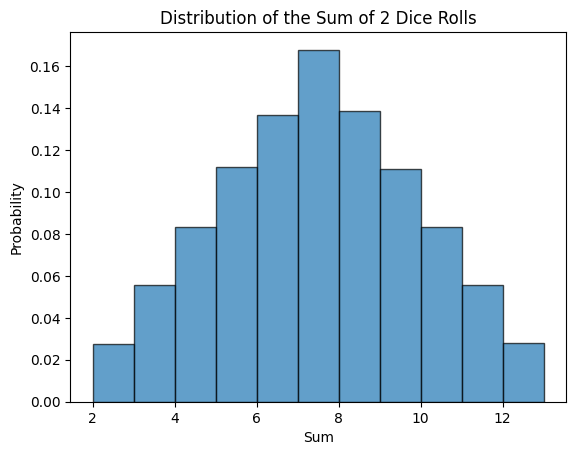

In [37]:
optionDice = OptionDiceProbability(2, 150000)
sums = optionDice.roll_dices_for_sample_run()

optionDice.plot_distribution(sums)


In [32]:
print(f"Mean value: {optionDice.mean} for number of runs {optionDice.number_of_runs}")
print(f"Standard deviation: {optionDice.standard_deviation} for number of runs {optionDice.number_of_runs}")

Mean value: 7.003213333333333 for number of runs 150000
Standard deviation: 2.4159862736549 for number of runs 150000


In [33]:
print(f"Calculate the probability of the sum been less than 3 or greater than 10: {optionDice.calculate_probability()} ")
print(f"Calculate the probability under a condition equal to 7 : {optionDice.calculate_probability_under_condition()}")

Calculate the probability of the sum been less than 3 or greater than 10: 0.6944444444444444 
Calculate the probability under a condition equal to 7 : 0.19444444444444445


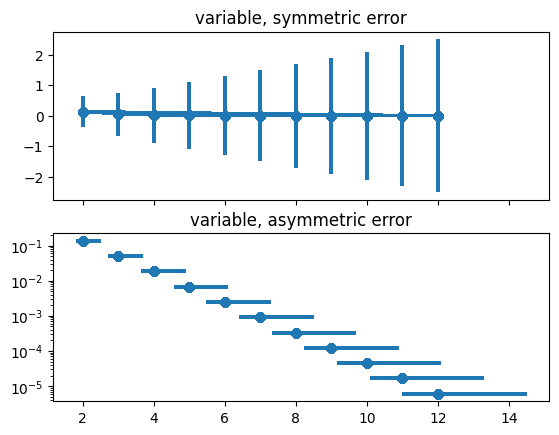

In [35]:
# for my reference # 
x = np.array(sums)
y = np.exp(-x)
# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

# error bar values w/ different -/+ errors
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')

plt.show()

Write you reflection in below cell.

* Random number is not a true random, I tried to use a seed , but still I felt the numbers where not true random , would love to use a true random number generator to see the result and see how fast the number 7 popup at the top. As the experiment is very dependent on the randomness of the random number generator. But then again for the POC it may do 
* I got carried away with the code, until I saw the code from Melanie Walsh and that helped to come down to earth and remove a lot of the extra changes I had in place.
* The number of executions for the two dice experiment after a given number, stops making a difference on the output, as the result settles down, I noticed after 1000 runs. I left the run at 150,000 but it doesnt add any after value the large number.